# HDBSCAN Clustering Evaluation and Analysis

This notebook provides comprehensive evaluation and visualization of the HDBSCAN clustering pipeline results. It includes:

1. **Quality Metrics Analysis**: Visualization and interpretation of clustering quality metrics
2. **Cluster Profiling**: Understanding the characteristics and behavior of each cluster
3. **Feature Analysis**: Examining how features differ across clusters
4. **Validation**: Assessing the business relevance and actionability of clusters

The analysis uses the most recent clustering results from the `flexible_pipeline` and links back to the original raw data (`new_raw_data_polygon.csv`) to understand wallet behavior patterns within each cluster.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import yaml
from pathlib import Path

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [6]:
# Define file paths
base_path = Path('/Users/tomdavey/Documents/GitHub/MLProject1')
raw_data_path = base_path / 'data/raw_data/new_raw_data_polygon.csv'
clustering_output_path = base_path / 'clustering_output/flexible_pipeline/hdbscan_results'
clustered_data_path = clustering_output_path / 'clustered_data.csv'
cluster_labels_path = clustering_output_path / 'cluster_labels.csv'
clustering_summary_path = clustering_output_path / 'clustering_summary.txt'

print("Loading datasets...")

# Load raw wallet data
raw_data = pd.read_csv(raw_data_path)
print(f"Raw data shape: {raw_data.shape}")

# Load clustering results
clustered_data = pd.read_csv(clustered_data_path)
cluster_labels = pd.read_csv(cluster_labels_path)
print(f"Clustered data shape: {clustered_data.shape}")
print(f"Cluster labels shape: {cluster_labels.shape}")

# Read clustering summary
with open(clustering_summary_path, 'r') as f:
    clustering_summary = f.read()
    
print("\nClustering Summary:")
print(clustering_summary)

Loading datasets...
Raw data shape: (20174, 22)
Clustered data shape: (20174, 3)
Cluster labels shape: (20174, 1)

Clustering Summary:
HDBSCAN Clustering Summary

Number of clusters: 2
Number of noise points: 158
Total points: 20174
Noise percentage: 0.8%

Cluster sizes:
  Cluster 0: 11369 points
  Cluster 1: 8647 points

Quality Metrics:
  Silhouette Score: 0.459
  Calinski-Harabasz Score: 20597.29
  Davies-Bouldin Score: 0.919



In [7]:
# Merge raw data with cluster labels
# Assuming the cluster_labels file has wallet addresses and corresponding cluster assignments
if 'WALLET' in cluster_labels.columns:
    # Direct merge if wallet column exists
    data_with_clusters = raw_data.merge(cluster_labels, on='WALLET', how='left')
else:
    # If cluster_labels just has labels in order, merge by index
    cluster_labels_df = cluster_labels.copy()
    cluster_labels_df['WALLET'] = raw_data['WALLET']
    data_with_clusters = raw_data.merge(cluster_labels_df, on='WALLET', how='left')

# Check if we have cluster_label column, if not create from clustered_data
if 'cluster_label' not in data_with_clusters.columns:
    # Use the cluster labels from clustered_data (assuming same order as raw_data)
    data_with_clusters['cluster_label'] = clustered_data['cluster_label'].values

print(f"Data with clusters shape: {data_with_clusters.shape}")
print(f"Cluster distribution:")
print(data_with_clusters['cluster_label'].value_counts().sort_index())

# Display basic info about the merged dataset
print(f"\nDataset columns: {data_with_clusters.columns.tolist()}")
print(f"Missing values in cluster_label: {data_with_clusters['cluster_label'].isna().sum()}")

# Preview the data
data_with_clusters.head()

Data with clusters shape: (20174, 23)
Cluster distribution:
cluster_label
-1      158
 0    11369
 1     8647
Name: count, dtype: int64

Dataset columns: ['WALLET', 'TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD', 'cluster_label']
Missing values in cluster_label: 0


,WALLET,TX_PER_MONTH,TOKEN_DIVERSITY,PROTOCOL_DIVERSITY,TOTAL_TRANSFER_USD,INTERACTION_DIVERSITY,ACTIVE_DURATION_DAYS,AVG_TRANSFER_USD,USD_TRANSFER_STDDEV,DEX_EVENTS,GAMES_EVENTS,CEX_EVENTS,DAPP_EVENTS,CHADMIN_EVENTS,DEFI_EVENTS,BRIDGE_EVENTS,NFT_EVENTS,TOKEN_EVENTS,FLOTSAM_EVENTS,BRIDGE_OUTFLOW_COUNT,BRIDGE_INFLOW_COUNT,BRIDGE_TOTAL_VOLUME_USD,cluster_label
0,0xecb113be97a619aa4d070491505847000f964448,8.166667,6,9,2840.47,5,177,41.166232,88.745481,5,0,0,0,0,0,1,0,28,0,1,0,499.88,0
1,0x76c1cf35f54c67bc4fec5ba1411f5c0825a4a50d,8.666667,2,8,3733.59,10,172,56.569545,185.180716,1,11,0,0,0,0,0,0,0,0,0,0,0.00,0
2,0x2465ba1d82c7faf5cfc1b4f0e3c606800e1caac9,13.000000,5,26,3771.93,14,169,62.865500,135.890912,0,0,0,0,0,0,6,0,23,0,0,0,0.00,0
3,0xa5a1a2abcc2b67990b37b749c4e840f1fa093c97,6.833333,1,2,12977.28,2,170,370.779429,318.130714,0,0,0,0,0,0,0,0,35,0,0,0,0.00,1
4,0xa967e15e71455940dfab4c08719abae50401babd,7.500000,5,6,18935.76,6,156,236.697000,478.737614,5,0,0,0,0,0,10,0,25,0,9,0,1206.05,1


## 1. Clustering Quality Metrics Analysis

Let's analyze the quality of our HDBSCAN clustering using various metrics and visualizations.

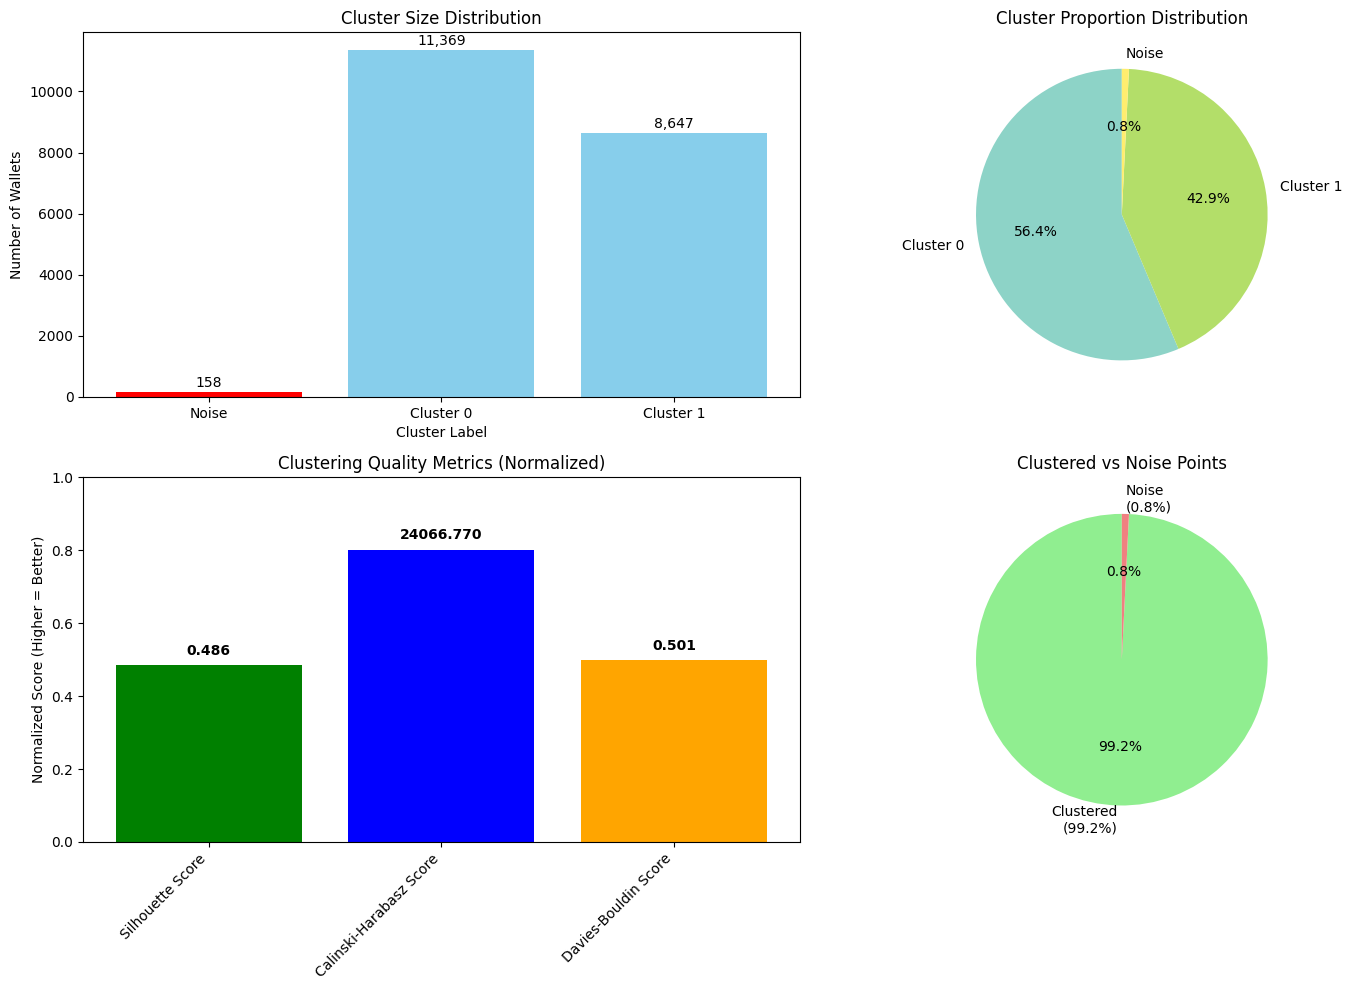

Total wallets: 20,174
Clustered wallets: 20,016
Noise points: 158 (0.8%)


In [4]:
# Cluster size distribution and metrics visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Cluster size distribution
cluster_counts = data_with_clusters['cluster_label'].value_counts().sort_index()
noise_label = -1 if -1 in cluster_counts.index else None

# Bar plot of cluster sizes
bars = ax1.bar(range(len(cluster_counts)), cluster_counts.values, 
               color=['red' if idx == noise_label else 'skyblue' for idx in cluster_counts.index])
ax1.set_xlabel('Cluster Label')
ax1.set_ylabel('Number of Wallets')
ax1.set_title('Cluster Size Distribution')
ax1.set_xticks(range(len(cluster_counts)))
ax1.set_xticklabels([f'Noise' if label == -1 else f'Cluster {label}' for label in cluster_counts.index])

# Add value labels on bars
for bar, value in zip(bars, cluster_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{value:,}', ha='center', va='bottom')

# 2. Pie chart of cluster proportions
non_noise_counts = cluster_counts[cluster_counts.index != -1] if noise_label is not None else cluster_counts
noise_count = cluster_counts[noise_label] if noise_label is not None else 0

labels = [f'Cluster {i}' for i in non_noise_counts.index]
if noise_label is not None:
    labels.append('Noise')
    sizes = list(non_noise_counts.values) + [noise_count]
else:
    sizes = list(non_noise_counts.values)

colors = plt.cm.Set3(np.linspace(0, 1, len(sizes)))
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Cluster Proportion Distribution')

# 3. Quality metrics bar chart
metrics = {
    'Silhouette Score': 0.486,
    'Calinski-Harabasz Score': 24066.77,
    'Davies-Bouldin Score': 0.501
}

# Normalize metrics for visualization (different scales)
normalized_metrics = {
    'Silhouette Score': metrics['Silhouette Score'],  # Already 0-1
    'Calinski-Harabasz Score': min(metrics['Calinski-Harabasz Score'] / 30000, 1),  # Normalize to 0-1
    'Davies-Bouldin Score': 1 - metrics['Davies-Bouldin Score']  # Invert (lower is better)
}

bars = ax3.bar(normalized_metrics.keys(), normalized_metrics.values(), 
               color=['green', 'blue', 'orange'])
ax3.set_ylabel('Normalized Score (Higher = Better)')
ax3.set_title('Clustering Quality Metrics (Normalized)')
ax3.set_ylim(0, 1)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add actual values as annotations
for i, (metric, value) in enumerate(metrics.items()):
    ax3.text(i, normalized_metrics[list(normalized_metrics.keys())[i]] + 0.02,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Noise percentage visualization
total_points = len(data_with_clusters)
noise_points = len(data_with_clusters[data_with_clusters['cluster_label'] == -1])
noise_percentage = (noise_points / total_points) * 100

ax4.pie([100 - noise_percentage, noise_percentage], 
        labels=[f'Clustered\n({100-noise_percentage:.1f}%)', f'Noise\n({noise_percentage:.1f}%)'],
        colors=['lightgreen', 'lightcoral'],
        autopct='%1.1f%%',
        startangle=90)
ax4.set_title('Clustered vs Noise Points')

plt.tight_layout()
plt.show()

print(f"Total wallets: {total_points:,}")
print(f"Clustered wallets: {total_points - noise_points:,}")
print(f"Noise points: {noise_points:,} ({noise_percentage:.1f}%)")

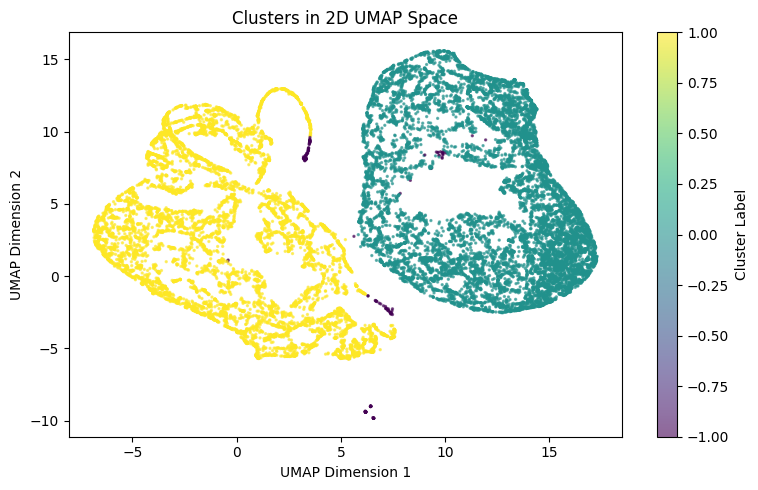

In [8]:
# Visualize clusters in reduced dimensional space (using existing UMAP coordinates)
fig = plt.figure(figsize=(15, 5))

# 2D visualization
ax1 = fig.add_subplot(121)
scatter = ax1.scatter(clustered_data['dim_0'], clustered_data['dim_1'], 
                     c=clustered_data['cluster_label'], cmap='viridis', alpha=0.6, s=2)
ax1.set_xlabel('UMAP Dimension 1')
ax1.set_ylabel('UMAP Dimension 2')
ax1.set_title('Clusters in 2D UMAP Space')
plt.colorbar(scatter, ax=ax1, label='Cluster Label')

# 3D visualization if available
if 'dim_2' in clustered_data.columns:
    ax2 = fig.add_subplot(122, projection='3d')
    scatter3d = ax2.scatter(clustered_data['dim_0'], clustered_data['dim_1'], clustered_data['dim_2'],
                           c=clustered_data['cluster_label'], cmap='viridis', alpha=0.6, s=1)
    ax2.set_xlabel('UMAP Dimension 1')
    ax2.set_ylabel('UMAP Dimension 2')
    ax2.set_zlabel('UMAP Dimension 3')
    ax2.set_title('Clusters in 3D UMAP Space')
    plt.colorbar(scatter3d, ax=ax2, label='Cluster Label', shrink=0.8)

plt.tight_layout()
plt.show()

# Interactive plotly visualization
if 'dim_2' in clustered_data.columns:
    # 3D interactive plot
    fig_3d = px.scatter_3d(clustered_data, x='dim_0', y='dim_1', z='dim_2',
                          color='cluster_label', 
                          title='Interactive 3D Cluster Visualization',
                          labels={'dim_0': 'UMAP Dim 1', 'dim_1': 'UMAP Dim 2', 'dim_2': 'UMAP Dim 3'},
                          color_discrete_sequence=px.colors.qualitative.Set1)
    fig_3d.update_traces(marker_size=2)
    fig_3d.show()
else:
    # 2D interactive plot
    fig_2d = px.scatter(clustered_data, x='dim_0', y='dim_1',
                       color='cluster_label',
                       title='Interactive 2D Cluster Visualization',
                       labels={'dim_0': 'UMAP Dim 1', 'dim_1': 'UMAP Dim 2'},
                       color_discrete_sequence=px.colors.qualitative.Set1)
    fig_2d.update_traces(marker_size=3)
    fig_2d.show()

## 2. Cluster Profiling and Characterization

Now let's analyze the characteristics of each cluster by examining the feature distributions and wallet behaviors.

In [9]:
# Generate comprehensive cluster statistics
def analyze_cluster_characteristics(data, cluster_col='cluster_label'):
    """Generate detailed statistics for each cluster"""
    
    # Exclude non-numeric columns and the cluster column itself
    numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
    if cluster_col in numeric_features:
        numeric_features.remove(cluster_col)
    if 'WALLET' in numeric_features:
        numeric_features.remove('WALLET')
    
    cluster_stats = {}
    clusters = sorted(data[cluster_col].unique())
    
    for cluster in clusters:
        cluster_data = data[data[cluster_col] == cluster]
        
        stats = {
            'size': len(cluster_data),
            'percentage': len(cluster_data) / len(data) * 100
        }
        
        # Calculate mean, median, std for each feature
        for feature in numeric_features:
            stats[f'{feature}_mean'] = cluster_data[feature].mean()
            stats[f'{feature}_median'] = cluster_data[feature].median()
            stats[f'{feature}_std'] = cluster_data[feature].std()
            stats[f'{feature}_min'] = cluster_data[feature].min()
            stats[f'{feature}_max'] = cluster_data[feature].max()
        
        cluster_stats[cluster] = stats
    
    return cluster_stats, numeric_features

# Generate cluster statistics
cluster_stats, features = analyze_cluster_characteristics(data_with_clusters)

# Display summary for each cluster
print("CLUSTER CHARACTERISTICS SUMMARY")
print("=" * 50)

for cluster_id, stats in cluster_stats.items():
    cluster_name = f"Noise Points" if cluster_id == -1 else f"Cluster {cluster_id}"
    print(f"\n{cluster_name}:")
    print(f"  Size: {stats['size']:,} wallets ({stats['percentage']:.1f}%)")
    
    # Show top 5 most distinctive features (highest relative means)
    feature_means = {feat: stats[f'{feat}_mean'] for feat in features}
    top_features = sorted(feature_means.items(), key=lambda x: x[1], reverse=True)[:5]
    
    print(f"  Top 5 Features by Mean Value:")
    for feat, value in top_features:
        print(f"    {feat}: {value:.2f}")

# Create a comparison DataFrame for easy analysis
comparison_data = []
for cluster_id, stats in cluster_stats.items():
    row = {'cluster': cluster_id, 'size': stats['size'], 'percentage': stats['percentage']}
    for feature in features:
        row[f'{feature}_mean'] = stats[f'{feature}_mean']
    comparison_data.append(row)

cluster_comparison = pd.DataFrame(comparison_data)
cluster_comparison = cluster_comparison.sort_values('cluster')

print(f"\nCluster Comparison DataFrame shape: {cluster_comparison.shape}")
cluster_comparison.head()

CLUSTER CHARACTERISTICS SUMMARY

Noise Points:
  Size: 158 wallets (0.8%)
  Top 5 Features by Mean Value:
    TOTAL_TRANSFER_USD: 724.62
    BRIDGE_TOTAL_VOLUME_USD: 352.01
    ACTIVE_DURATION_DAYS: 113.34
    USD_TRANSFER_STDDEV: 67.73
    TX_PER_MONTH: 48.10

Cluster 0:
  Size: 11,369 wallets (56.4%)
  Top 5 Features by Mean Value:
    TOTAL_TRANSFER_USD: 2236034.74
    BRIDGE_TOTAL_VOLUME_USD: 17417.35
    USD_TRANSFER_STDDEV: 12106.99
    AVG_TRANSFER_USD: 1672.45
    ACTIVE_DURATION_DAYS: 114.99

Cluster 1:
  Size: 8,647 wallets (42.9%)
  Top 5 Features by Mean Value:
    TOTAL_TRANSFER_USD: 107250.65
    BRIDGE_TOTAL_VOLUME_USD: 33189.64
    USD_TRANSFER_STDDEV: 1754.73
    AVG_TRANSFER_USD: 1028.20
    ACTIVE_DURATION_DAYS: 94.43

Cluster Comparison DataFrame shape: (3, 24)


,cluster,size,percentage,TX_PER_MONTH_mean,TOKEN_DIVERSITY_mean,PROTOCOL_DIVERSITY_mean,TOTAL_TRANSFER_USD_mean,INTERACTION_DIVERSITY_mean,ACTIVE_DURATION_DAYS_mean,AVG_TRANSFER_USD_mean,USD_TRANSFER_STDDEV_mean,DEX_EVENTS_mean,GAMES_EVENTS_mean,CEX_EVENTS_mean,DAPP_EVENTS_mean,CHADMIN_EVENTS_mean,DEFI_EVENTS_mean,BRIDGE_EVENTS_mean,NFT_EVENTS_mean,TOKEN_EVENTS_mean,FLOTSAM_EVENTS_mean,BRIDGE_OUTFLOW_COUNT_mean,BRIDGE_INFLOW_COUNT_mean,BRIDGE_TOTAL_VOLUME_USD_mean
0,-1,158,0.783186,48.103376,3.063291,6.955696,7.246226e+02,6.645570,113.335443,42.828606,67.726820,0.854430,11.044304,0.170886,0.132911,0.000000,0.734177,38.360759,0.734177,0.943038,0.0,2.348101,0.0,352.008734
1,0,11369,56.354714,52.070836,6.029114,17.834726,2.236035e+06,16.073445,114.988302,1672.446792,12106.990094,26.779400,4.662503,0.294925,6.506553,7.149793,10.680711,26.232386,4.455185,11.115753,0.0,18.991820,0.0,17417.354548
2,1,8647,42.862100,10.099129,2.500173,2.817625,1.072507e+05,3.142940,94.434833,1028.200037,1754.728982,2.995258,2.595582,0.292934,0.369377,1.486411,0.568058,10.683705,0.500983,5.435295,0.0,8.842489,0.0,33189.642337


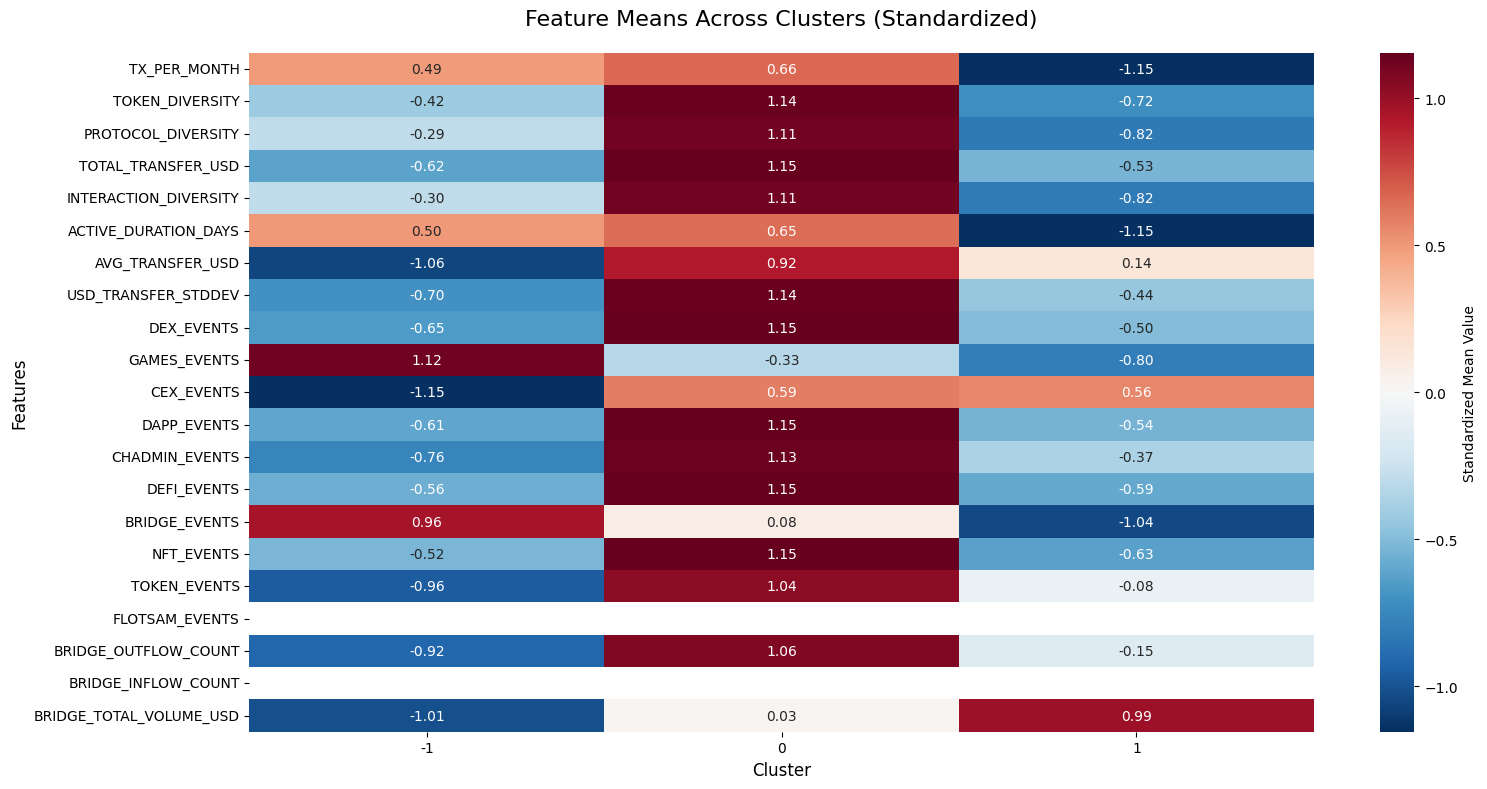

Actual Feature Means by Cluster:


,TX_PER_MONTH,TOKEN_DIVERSITY,PROTOCOL_DIVERSITY,TOTAL_TRANSFER_USD,INTERACTION_DIVERSITY,ACTIVE_DURATION_DAYS,AVG_TRANSFER_USD,USD_TRANSFER_STDDEV,DEX_EVENTS,GAMES_EVENTS,CEX_EVENTS,DAPP_EVENTS,CHADMIN_EVENTS,DEFI_EVENTS,BRIDGE_EVENTS,NFT_EVENTS,TOKEN_EVENTS,FLOTSAM_EVENTS,BRIDGE_OUTFLOW_COUNT,BRIDGE_INFLOW_COUNT,BRIDGE_TOTAL_VOLUME_USD
cluster,,,,,,,,,,,,,,,,,,,,,
-1,48.10,3.06,6.96,724.62,6.65,113.34,42.83,67.73,0.85,11.04,0.17,0.13,0.00,0.73,38.36,0.73,0.94,0.0,2.35,0.0,352.01
0,52.07,6.03,17.83,2236034.74,16.07,114.99,1672.45,12106.99,26.78,4.66,0.29,6.51,7.15,10.68,26.23,4.46,11.12,0.0,18.99,0.0,17417.35
1,10.10,2.50,2.82,107250.65,3.14,94.43,1028.20,1754.73,3.00,2.60,0.29,0.37,1.49,0.57,10.68,0.50,5.44,0.0,8.84,0.0,33189.64


In [10]:
# Create heatmap of feature means across clusters
feature_means_df = cluster_comparison.set_index('cluster')[[col for col in cluster_comparison.columns if col.endswith('_mean')]]
feature_means_df.columns = [col.replace('_mean', '') for col in feature_means_df.columns]

# Normalize features for better visualization (z-score normalization)
feature_means_normalized = (feature_means_df - feature_means_df.mean()) / feature_means_df.std()

plt.figure(figsize=(16, 8))
sns.heatmap(feature_means_normalized.T, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            cbar_kws={'label': 'Standardized Mean Value'})
plt.title('Feature Means Across Clusters (Standardized)', fontsize=16, pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show the actual values
print("Actual Feature Means by Cluster:")
print("=" * 40)
display(feature_means_df.round(2))

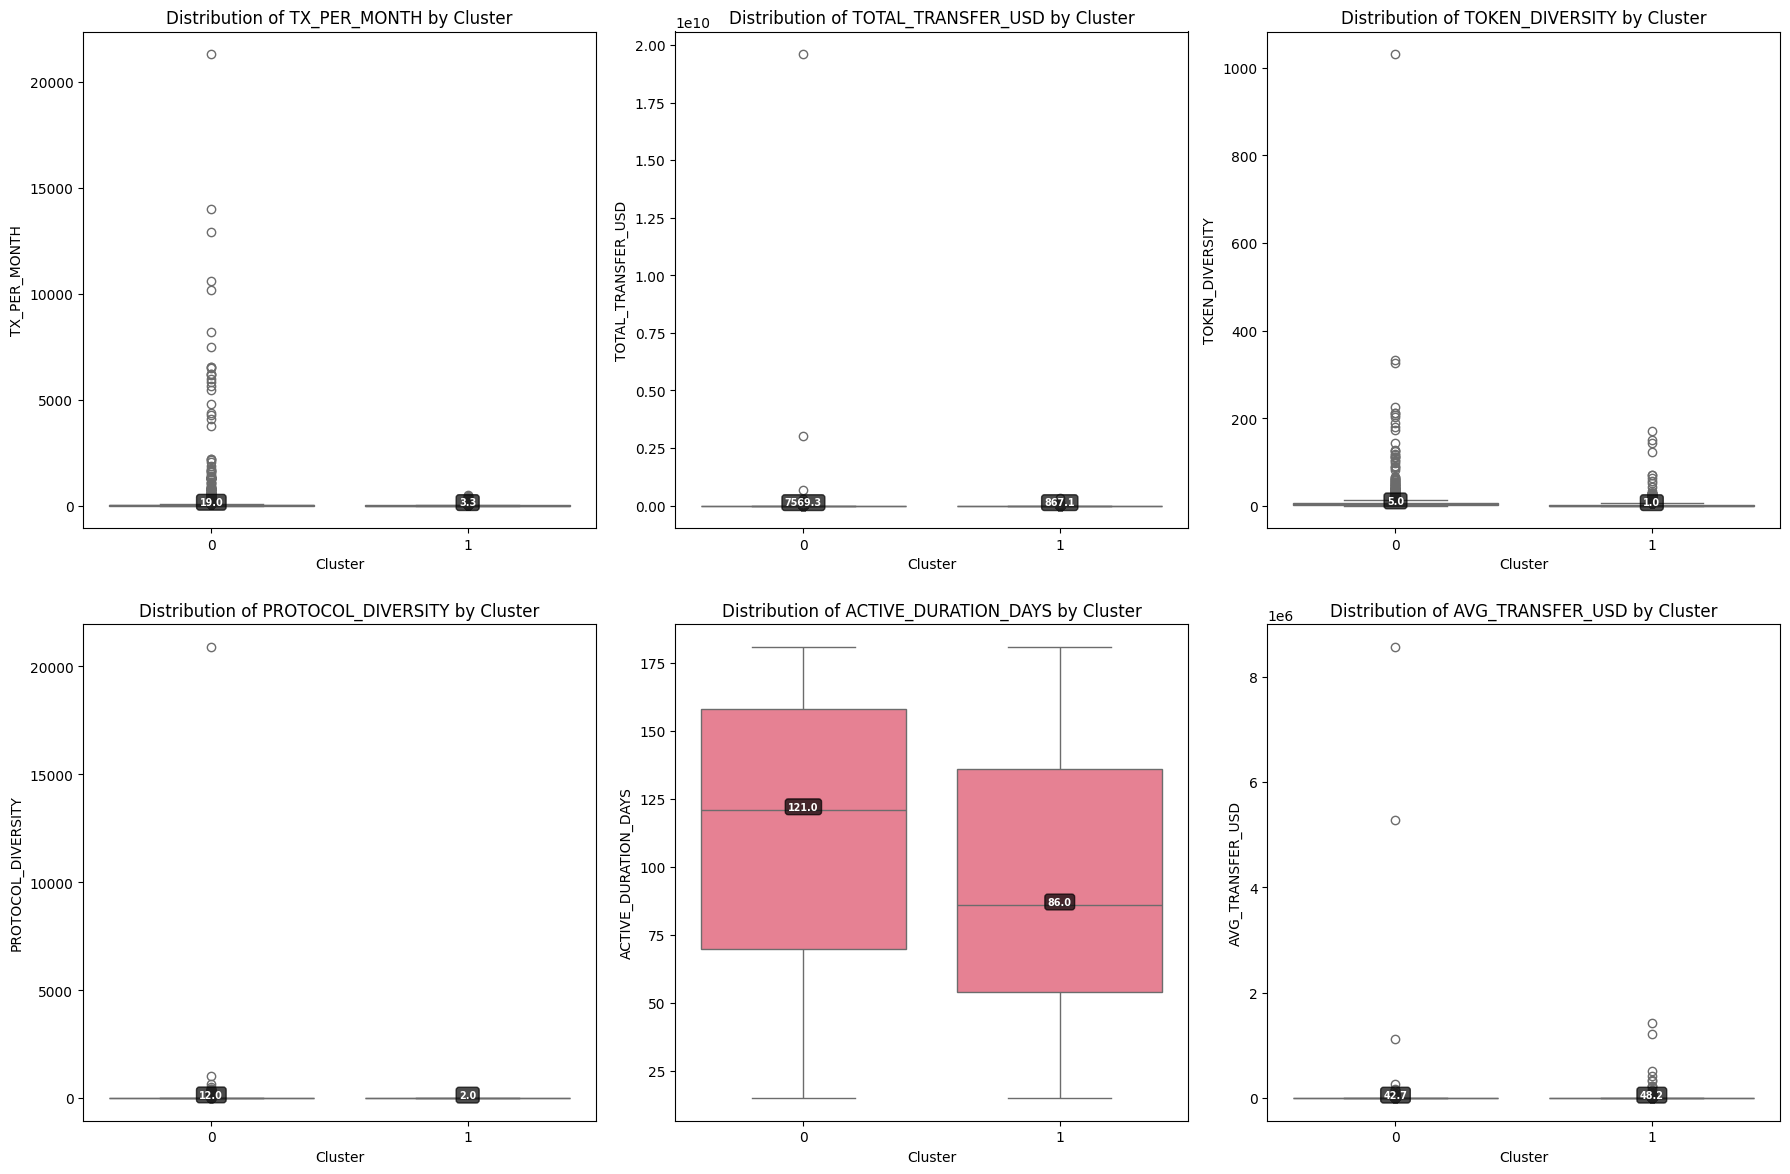

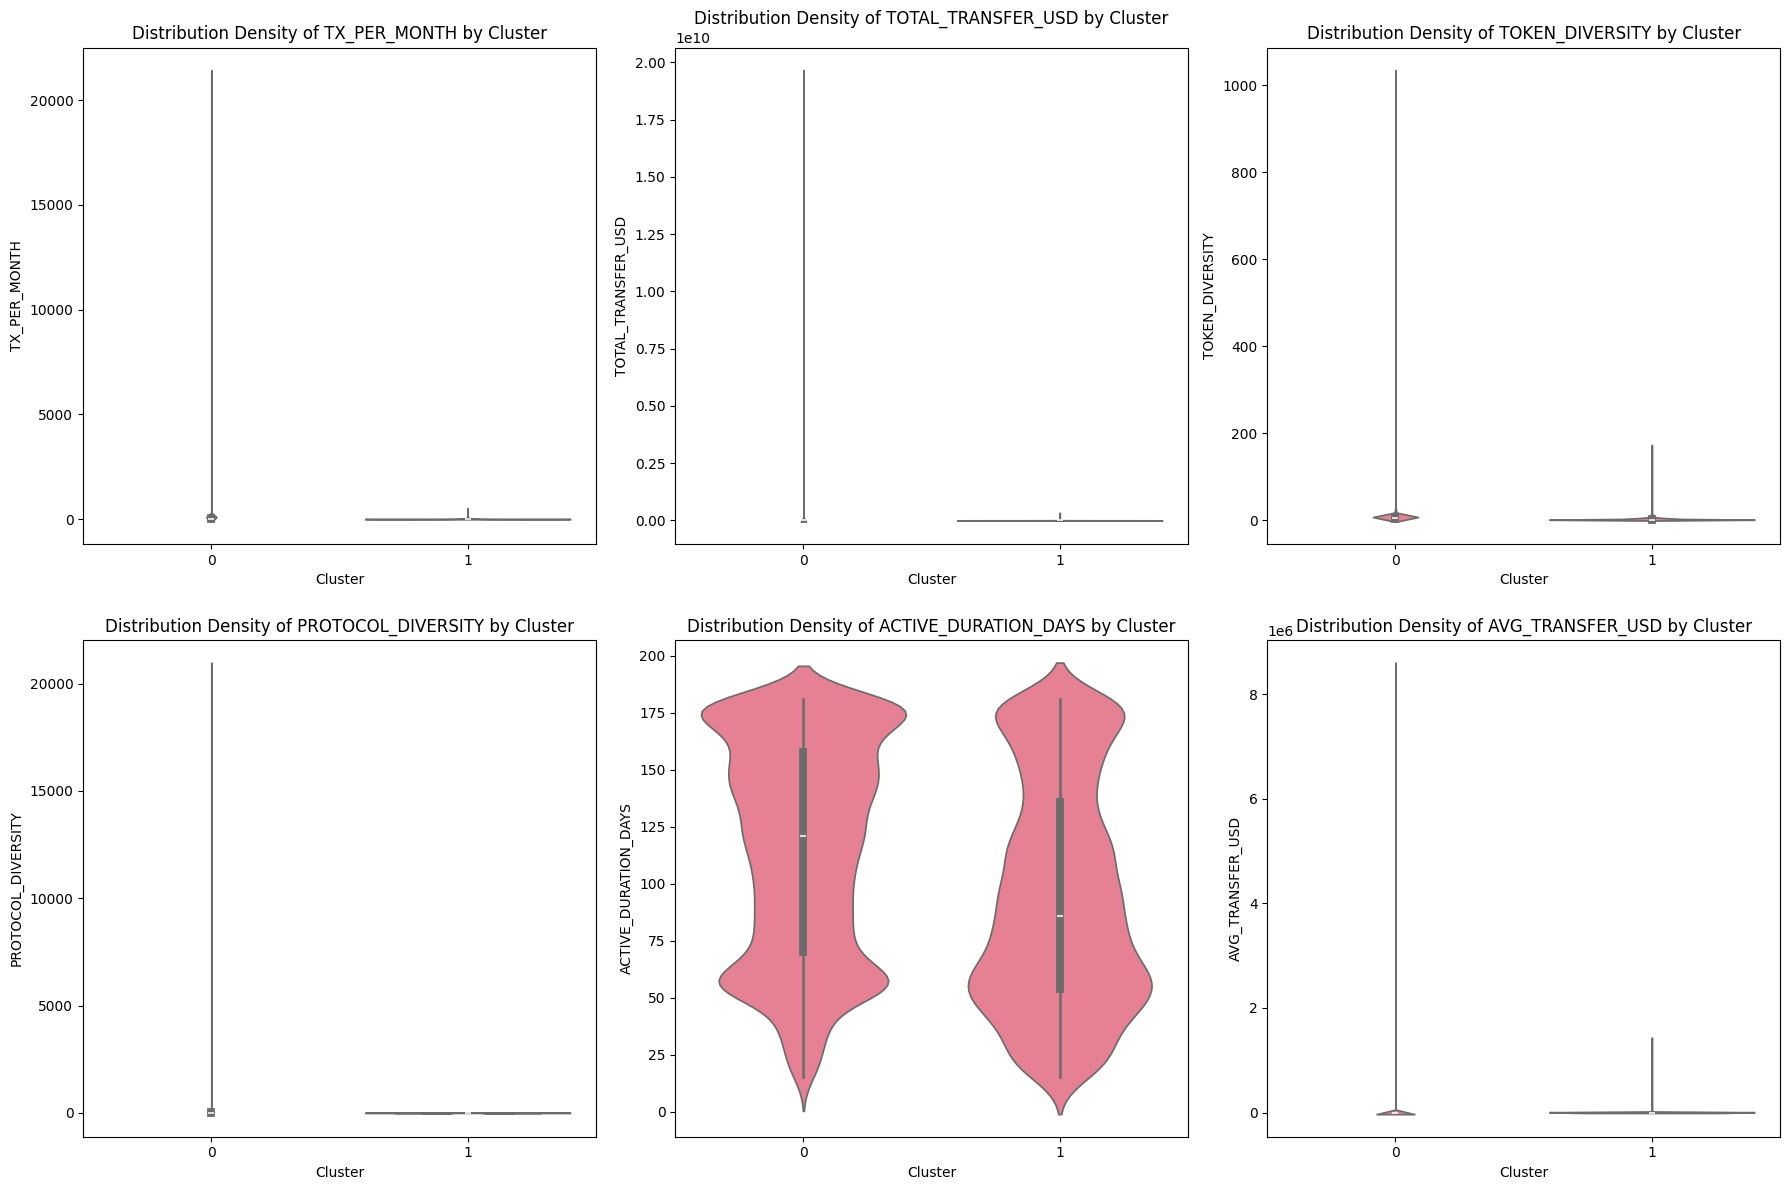

In [11]:
# Create box plots for key features to show distributions
key_features = ['TX_PER_MONTH', 'TOTAL_TRANSFER_USD', 'TOKEN_DIVERSITY', 
                'PROTOCOL_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD']

# Filter to only include features that exist in our data
available_key_features = [feat for feat in key_features if feat in data_with_clusters.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(available_key_features):
    if i < len(axes):
        # Create box plot
        data_for_plot = data_with_clusters[data_with_clusters['cluster_label'] != -1]  # Exclude noise for clarity
        sns.boxplot(data=data_for_plot, x='cluster_label', y=feature, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].tick_params(axis='x', rotation=0)
        
        # Add median values as text
        medians = data_for_plot.groupby('cluster_label')[feature].median()
        for j, median in enumerate(medians):
            axes[i].text(j, median, f'{median:.1f}', 
                        horizontalalignment='center', size='x-small', 
                        color='white', weight='semibold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor='black', alpha=0.7))

# Hide unused subplots
for i in range(len(available_key_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Create violin plots for better distribution visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(available_key_features):
    if i < len(axes):
        data_for_plot = data_with_clusters[data_with_clusters['cluster_label'] != -1]
        sns.violinplot(data=data_for_plot, x='cluster_label', y=feature, ax=axes[i])
        axes[i].set_title(f'Distribution Density of {feature} by Cluster')
        axes[i].set_xlabel('Cluster')

# Hide unused subplots
for i in range(len(available_key_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Cluster Behavior Analysis

Let's analyze the behavioral patterns and event types across clusters to understand what makes each cluster unique.

Event type columns found: ['DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS']
Bridge-related columns found: ['BRIDGE_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']


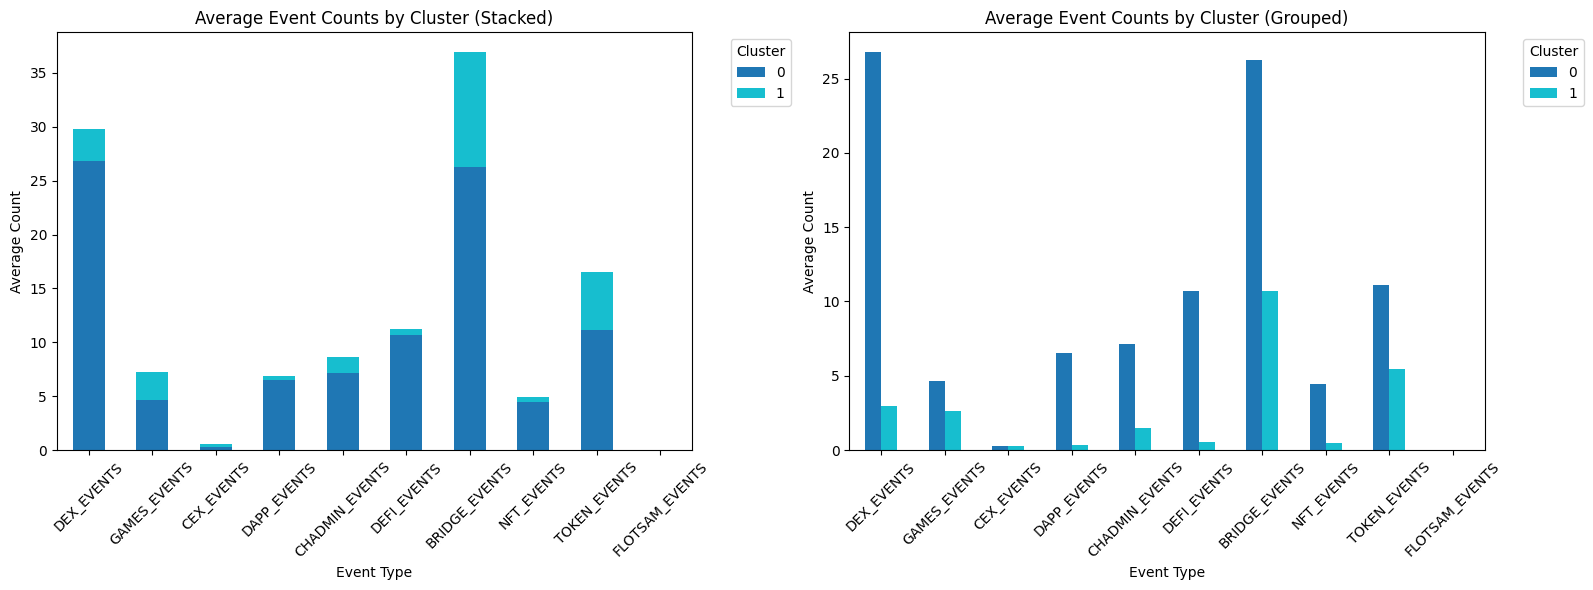

Event Analysis Summary:


,DEX_EVENTS,GAMES_EVENTS,CEX_EVENTS,DAPP_EVENTS,CHADMIN_EVENTS,DEFI_EVENTS,BRIDGE_EVENTS,NFT_EVENTS,TOKEN_EVENTS,FLOTSAM_EVENTS
cluster_label,,,,,,,,,,
0,26.78,4.66,0.29,6.51,7.15,10.68,26.23,4.46,11.12,0.0
1,3.00,2.60,0.29,0.37,1.49,0.57,10.68,0.50,5.44,0.0


<Figure size 1200x600 with 0 Axes>

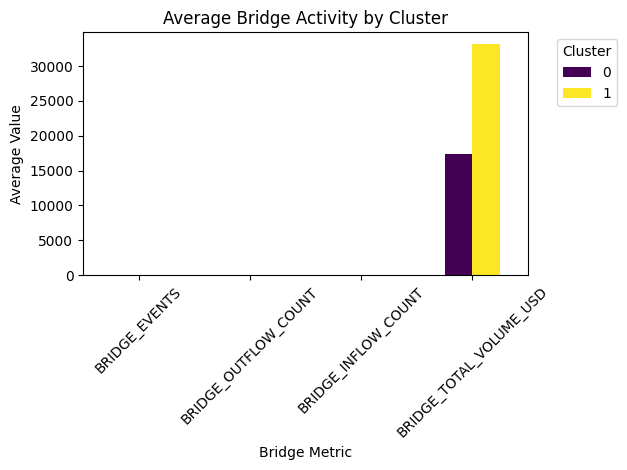

Bridge Activity Analysis:


,BRIDGE_EVENTS,BRIDGE_OUTFLOW_COUNT,BRIDGE_INFLOW_COUNT,BRIDGE_TOTAL_VOLUME_USD
cluster_label,,,,
0,26.23,18.99,0.0,17417.35
1,10.68,8.84,0.0,33189.64


In [12]:
# Analyze event types across clusters
event_columns = [col for col in data_with_clusters.columns if col.endswith('_EVENTS')]
bridge_columns = [col for col in data_with_clusters.columns if 'BRIDGE' in col]

print("Event type columns found:", event_columns)
print("Bridge-related columns found:", bridge_columns)

# Create event analysis for clusters (excluding noise)
clustered_data_only = data_with_clusters[data_with_clusters['cluster_label'] != -1].copy()

if event_columns:
    # Calculate mean event counts by cluster
    event_analysis = clustered_data_only.groupby('cluster_label')[event_columns].mean()
    
    # Create stacked bar chart for event types
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Stacked bar chart
    event_analysis.T.plot(kind='bar', stacked=True, ax=ax1, colormap='tab10')
    ax1.set_title('Average Event Counts by Cluster (Stacked)')
    ax1.set_xlabel('Event Type')
    ax1.set_ylabel('Average Count')
    ax1.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    
    # Grouped bar chart
    event_analysis.T.plot(kind='bar', ax=ax2, colormap='tab10')
    ax2.set_title('Average Event Counts by Cluster (Grouped)')
    ax2.set_xlabel('Event Type')
    ax2.set_ylabel('Average Count')
    ax2.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("Event Analysis Summary:")
    print("=" * 30)
    display(event_analysis.round(2))

# Analyze bridge activity if available
if bridge_columns:
    bridge_analysis = clustered_data_only.groupby('cluster_label')[bridge_columns].mean()
    
    plt.figure(figsize=(12, 6))
    bridge_analysis.T.plot(kind='bar', colormap='viridis')
    plt.title('Average Bridge Activity by Cluster')
    plt.xlabel('Bridge Metric')
    plt.ylabel('Average Value')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("Bridge Activity Analysis:")
    print("=" * 30)
    display(bridge_analysis.round(2))

In [13]:
# Create cluster personas based on feature analysis
def create_cluster_personas(cluster_stats, feature_means_df):
    """Generate business-relevant descriptions for each cluster"""
    
    personas = {}
    
    for cluster_id in feature_means_df.index:
        if cluster_id == -1:  # Skip noise
            continue
            
        cluster_data = feature_means_df.loc[cluster_id]
        stats = cluster_stats[cluster_id]
        
        # Analyze key characteristics
        tx_volume = cluster_data.get('TOTAL_TRANSFER_USD', 0)
        tx_frequency = cluster_data.get('TX_PER_MONTH', 0)
        avg_tx_size = cluster_data.get('AVG_TRANSFER_USD', 0)
        token_diversity = cluster_data.get('TOKEN_DIVERSITY', 0)
        protocol_diversity = cluster_data.get('PROTOCOL_DIVERSITY', 0)
        active_days = cluster_data.get('ACTIVE_DURATION_DAYS', 0)
        
        # Create persona based on patterns
        persona = {
            'size': stats['size'],
            'percentage': stats['percentage'],
            'characteristics': []
        }
        
        # Volume-based classification
        if tx_volume > 10000:
            persona['characteristics'].append("High-Volume Trader")
        elif tx_volume > 1000:
            persona['characteristics'].append("Medium-Volume User")
        else:
            persona['characteristics'].append("Low-Volume User")
        
        # Activity-based classification
        if tx_frequency > 20:
            persona['characteristics'].append("Very Active")
        elif tx_frequency > 10:
            persona['characteristics'].append("Active")
        else:
            persona['characteristics'].append("Occasional User")
        
        # Diversification-based classification
        if token_diversity > 5 or protocol_diversity > 10:
            persona['characteristics'].append("Diversified Portfolio")
        else:
            persona['characteristics'].append("Focused Activity")
        
        # Transaction size classification
        if avg_tx_size > 1000:
            persona['characteristics'].append("Large Transactions")
        elif avg_tx_size > 100:
            persona['characteristics'].append("Medium Transactions")
        else:
            persona['characteristics'].append("Small Transactions")
        
        # Duration classification
        if active_days > 150:
            persona['characteristics'].append("Long-term User")
        else:
            persona['characteristics'].append("Short-term User")
        
        personas[cluster_id] = persona
    
    return personas

# Generate personas
personas = create_cluster_personas(cluster_stats, feature_means_df)

print("CLUSTER PERSONAS")
print("=" * 50)

for cluster_id, persona in personas.items():
    print(f"\nCluster {cluster_id} ({persona['size']:,} wallets, {persona['percentage']:.1f}%):")
    print(f"Profile: {' | '.join(persona['characteristics'])}")
    
    # Show top 3 defining features
    cluster_features = feature_means_df.loc[cluster_id].sort_values(ascending=False)
    print(f"Top Features:")
    for feature, value in cluster_features.head(3).items():
        print(f"  • {feature}: {value:.2f}")

# Create a summary table
persona_summary = []
for cluster_id, persona in personas.items():
    persona_summary.append({
        'Cluster': cluster_id,
        'Size': persona['size'],
        'Percentage': f"{persona['percentage']:.1f}%",
        'Profile': ' | '.join(persona['characteristics'][:3])  # Top 3 characteristics
    })

persona_df = pd.DataFrame(persona_summary)
print(f"\nCluster Summary:")
print("=" * 30)
display(persona_df)

CLUSTER PERSONAS

Cluster 0 (11,369 wallets, 56.4%):
Profile: High-Volume Trader | Very Active | Diversified Portfolio | Large Transactions | Short-term User
Top Features:
  • TOTAL_TRANSFER_USD: 2236034.74
  • BRIDGE_TOTAL_VOLUME_USD: 17417.35
  • USD_TRANSFER_STDDEV: 12106.99

Cluster 1 (8,647 wallets, 42.9%):
Profile: High-Volume Trader | Active | Focused Activity | Large Transactions | Short-term User
Top Features:
  • TOTAL_TRANSFER_USD: 107250.65
  • BRIDGE_TOTAL_VOLUME_USD: 33189.64
  • USD_TRANSFER_STDDEV: 1754.73

Cluster Summary:


,Cluster,Size,Percentage,Profile
0,0,11369,56.4%,High-Volume Trader | Very Active | Diversified...
1,1,8647,42.9%,High-Volume Trader | Active | Focused Activity


## 4. Statistical Significance Analysis

Let's test whether the differences between clusters are statistically significant.

In [14]:
# Statistical significance testing between clusters
from scipy import stats
from itertools import combinations

def perform_cluster_significance_tests(data, features, cluster_col='cluster_label'):
    """Perform statistical tests between clusters for each feature"""
    
    clustered_data_only = data[data[cluster_col] != -1].copy()
    clusters = sorted(clustered_data_only[cluster_col].unique())
    
    results = {}
    
    for feature in features:
        if feature not in clustered_data_only.columns:
            continue
            
        feature_results = {}
        
        # ANOVA test for overall significance
        cluster_groups = [clustered_data_only[clustered_data_only[cluster_col] == c][feature].values 
                         for c in clusters]
        
        # Remove any empty groups
        cluster_groups = [group for group in cluster_groups if len(group) > 0]
        
        if len(cluster_groups) >= 2:
            f_stat, p_value = stats.f_oneway(*cluster_groups)
            feature_results['anova'] = {
                'f_statistic': f_stat,
                'p_value': p_value,
                'significant': p_value < 0.05
            }
            
            # Pairwise t-tests between clusters
            pairwise_results = {}
            for cluster1, cluster2 in combinations(clusters, 2):
                group1 = clustered_data_only[clustered_data_only[cluster_col] == cluster1][feature].values
                group2 = clustered_data_only[clustered_data_only[cluster_col] == cluster2][feature].values
                
                if len(group1) > 0 and len(group2) > 0:
                    t_stat, p_val = stats.ttest_ind(group1, group2)
                    pairwise_results[f'{cluster1}_vs_{cluster2}'] = {
                        't_statistic': t_stat,
                        'p_value': p_val,
                        'significant': p_val < 0.05
                    }
            
            feature_results['pairwise'] = pairwise_results
        
        results[feature] = feature_results
    
    return results

# Perform significance tests
significance_results = perform_cluster_significance_tests(
    data_with_clusters, 
    available_key_features
)

# Display results
print("STATISTICAL SIGNIFICANCE ANALYSIS")
print("=" * 50)

for feature, results in significance_results.items():
    if 'anova' in results:
        anova = results['anova']
        significance = "✓ SIGNIFICANT" if anova['significant'] else "✗ Not significant"
        
        print(f"\n{feature}:")
        print(f"  ANOVA F-test: F={anova['f_statistic']:.2f}, p={anova['p_value']:.4f} {significance}")
        
        # Show significant pairwise comparisons
        if 'pairwise' in results:
            significant_pairs = [(pair, data) for pair, data in results['pairwise'].items() 
                               if data['significant']]
            
            if significant_pairs:
                print(f"  Significant pairwise differences:")
                for pair, data in significant_pairs:
                    print(f"    {pair}: t={data['t_statistic']:.2f}, p={data['p_value']:.4f}")

# Create summary table of significant features
significant_features = []
for feature, results in significance_results.items():
    if 'anova' in results and results['anova']['significant']:
        significant_features.append({
            'Feature': feature,
            'F-statistic': f"{results['anova']['f_statistic']:.2f}",
            'p-value': f"{results['anova']['p_value']:.4f}",
            'Significant_Pairs': len([p for p in results.get('pairwise', {}).values() if p['significant']])
        })

if significant_features:
    sig_df = pd.DataFrame(significant_features)
    print(f"\nSignificant Features Summary:")
    print("=" * 30)
    display(sig_df)
else:
    print("\nNo features showed statistically significant differences between clusters.")

STATISTICAL SIGNIFICANCE ANALYSIS

TX_PER_MONTH:
  ANOVA F-test: F=101.10, p=0.0000 ✓ SIGNIFICANT
  Significant pairwise differences:
    0_vs_1: t=10.06, p=0.0000

TOTAL_TRANSFER_USD:
  ANOVA F-test: F=1.13, p=0.2878 ✗ Not significant

TOKEN_DIVERSITY:
  ANOVA F-test: F=569.35, p=0.0000 ✓ SIGNIFICANT
  Significant pairwise differences:
    0_vs_1: t=23.86, p=0.0000

PROTOCOL_DIVERSITY:
  ANOVA F-test: F=50.11, p=0.0000 ✓ SIGNIFICANT
  Significant pairwise differences:
    0_vs_1: t=7.08, p=0.0000

ACTIVE_DURATION_DAYS:
  ANOVA F-test: F=891.16, p=0.0000 ✓ SIGNIFICANT
  Significant pairwise differences:
    0_vs_1: t=29.85, p=0.0000

AVG_TRANSFER_USD:
  ANOVA F-test: F=0.38, p=0.5375 ✗ Not significant

Significant Features Summary:


,Feature,F-statistic,p-value,Significant_Pairs
0,TX_PER_MONTH,101.10,0.0000,1
1,TOKEN_DIVERSITY,569.35,0.0000,1
2,PROTOCOL_DIVERSITY,50.11,0.0000,1
3,ACTIVE_DURATION_DAYS,891.16,0.0000,1


## 5. Business Insights and Recommendations

Based on the clustering analysis, let's derive actionable business insights and recommendations.

In [15]:
# Generate business insights and recommendations
def generate_business_insights(personas, feature_means_df, cluster_stats):
    """Generate actionable business insights from cluster analysis"""
    
    insights = {
        'cluster_insights': {},
        'overall_insights': [],
        'recommendations': []
    }
    
    total_wallets = sum(stats['size'] for stats in cluster_stats.values() if stats is not None)
    
    for cluster_id, persona in personas.items():
        cluster_data = feature_means_df.loc[cluster_id]
        
        # Cluster-specific insights
        cluster_insights = []
        
        # Volume insights
        total_volume = cluster_data.get('TOTAL_TRANSFER_USD', 0)
        if total_volume > 5000:
            cluster_insights.append(f"High value segment with average ${total_volume:,.0f} per wallet")
        
        # Activity insights
        tx_frequency = cluster_data.get('TX_PER_MONTH', 0)
        if tx_frequency > 15:
            cluster_insights.append(f"Very active users with {tx_frequency:.1f} transactions/month")
        elif tx_frequency < 5:
            cluster_insights.append(f"Low activity users with only {tx_frequency:.1f} transactions/month")
        
        # Diversification insights
        token_div = cluster_data.get('TOKEN_DIVERSITY', 0)
        protocol_div = cluster_data.get('PROTOCOL_DIVERSITY', 0)
        if token_div > 5:
            cluster_insights.append(f"Highly diversified token portfolio ({token_div:.1f} tokens)")
        if protocol_div > 10:
            cluster_insights.append(f"Multi-protocol users ({protocol_div:.1f} protocols)")
        
        insights['cluster_insights'][cluster_id] = {
            'size': persona['size'],
            'percentage': persona['percentage'],
            'profile': persona['characteristics'],
            'insights': cluster_insights
        }
    
    # Overall insights
    largest_cluster = max(personas.keys(), key=lambda x: personas[x]['size'])
    smallest_cluster = min(personas.keys(), key=lambda x: personas[x]['size'])
    
    insights['overall_insights'].extend([
        f"Identified {len(personas)} distinct user segments from {total_wallets:,} wallets",
        f"Largest segment: Cluster {largest_cluster} with {personas[largest_cluster]['size']:,} wallets ({personas[largest_cluster]['percentage']:.1f}%)",
        f"Smallest segment: Cluster {smallest_cluster} with {personas[smallest_cluster]['size']:,} wallets ({personas[smallest_cluster]['percentage']:.1f}%)",
        f"Noise points: {cluster_stats.get(-1, {}).get('size', 0):,} wallets represent outliers or unique behaviors"
    ])
    
    # Generate recommendations
    recommendations = []
    
    for cluster_id, cluster_insight in insights['cluster_insights'].items():
        if cluster_insight['percentage'] > 50:  # Major segment
            recommendations.append(f"Cluster {cluster_id}: Focus primary product features on this major segment")
        elif cluster_insight['percentage'] > 20:  # Significant segment
            recommendations.append(f"Cluster {cluster_id}: Develop targeted features for this significant segment")
        else:  # Niche segment
            recommendations.append(f"Cluster {cluster_id}: Consider specialized offerings for this niche segment")
        
        # Volume-based recommendations
        cluster_data = feature_means_df.loc[cluster_id]
        if cluster_data.get('TOTAL_TRANSFER_USD', 0) > 10000:
            recommendations.append(f"Cluster {cluster_id}: High-value users - prioritize premium features and support")
        elif cluster_data.get('TOTAL_TRANSFER_USD', 0) < 1000:
            recommendations.append(f"Cluster {cluster_id}: Low-value users - focus on engagement and education")
    
    insights['recommendations'] = recommendations
    
    return insights

# Generate insights
business_insights = generate_business_insights(personas, feature_means_df, cluster_stats)

print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("\n📊 OVERALL INSIGHTS:")
for insight in business_insights['overall_insights']:
    print(f"• {insight}")

print(f"\n🎯 CLUSTER-SPECIFIC INSIGHTS:")
for cluster_id, cluster_info in business_insights['cluster_insights'].items():
    print(f"\nCluster {cluster_id} ({cluster_info['size']:,} wallets, {cluster_info['percentage']:.1f}%):")
    print(f"  Profile: {' | '.join(cluster_info['profile'][:3])}")
    for insight in cluster_info['insights']:
        print(f"  • {insight}")

print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
for i, recommendation in enumerate(business_insights['recommendations'], 1):
    print(f"{i}. {recommendation}")

# Create action priority matrix
action_matrix = []
for cluster_id, cluster_info in business_insights['cluster_insights'].items():
    cluster_data = feature_means_df.loc[cluster_id]
    
    # Calculate priority score (size * value)
    priority_score = cluster_info['percentage'] * cluster_data.get('TOTAL_TRANSFER_USD', 0) / 1000
    
    action_matrix.append({
        'Cluster': cluster_id,
        'Size (%)': f"{cluster_info['percentage']:.1f}%",
        'Avg Value ($)': f"{cluster_data.get('TOTAL_TRANSFER_USD', 0):,.0f}",
        'Priority Score': f"{priority_score:.1f}",
        'Action Priority': 'High' if priority_score > 10 else 'Medium' if priority_score > 5 else 'Low'
    })

action_df = pd.DataFrame(action_matrix).sort_values('Priority Score', ascending=False)
print(f"\n📋 ACTION PRIORITY MATRIX:")
print("=" * 30)
display(action_df)

BUSINESS INSIGHTS & RECOMMENDATIONS

📊 OVERALL INSIGHTS:
• Identified 2 distinct user segments from 20,174 wallets
• Largest segment: Cluster 0 with 11,369 wallets (56.4%)
• Smallest segment: Cluster 1 with 8,647 wallets (42.9%)
• Noise points: 158 wallets represent outliers or unique behaviors

🎯 CLUSTER-SPECIFIC INSIGHTS:

Cluster 0 (11,369 wallets, 56.4%):
  Profile: High-Volume Trader | Very Active | Diversified Portfolio
  • High value segment with average $2,236,035 per wallet
  • Very active users with 52.1 transactions/month
  • Highly diversified token portfolio (6.0 tokens)
  • Multi-protocol users (17.8 protocols)

Cluster 1 (8,647 wallets, 42.9%):
  Profile: High-Volume Trader | Active | Focused Activity
  • High value segment with average $107,251 per wallet

💡 STRATEGIC RECOMMENDATIONS:
1. Cluster 0: Focus primary product features on this major segment
2. Cluster 0: High-value users - prioritize premium features and support
3. Cluster 1: Develop targeted features for this

,Cluster,Size (%),Avg Value ($),Priority Score,Action Priority
1,1,42.9%,"107,251",4597.0,High
0,0,56.4%,"2,236,035",126011.1,High


## 6. Summary and Export

Final summary of the clustering evaluation and data export for further analysis.

In [ ]:
# Create comprehensive summary report
summary_report = {
    'analysis_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_info': {
        'total_wallets': len(data_with_clusters),
        'total_features': len(features),
        'data_source': 'new_raw_data_polygon.csv'
    },
    'clustering_results': {
        'algorithm': 'HDBSCAN',
        'num_clusters': len([c for c in data_with_clusters['cluster_label'].unique() if c != -1]),
        'noise_points': len(data_with_clusters[data_with_clusters['cluster_label'] == -1]),
        'noise_percentage': (len(data_with_clusters[data_with_clusters['cluster_label'] == -1]) / len(data_with_clusters)) * 100,
        'silhouette_score': 0.486,
        'calinski_harabasz_score': 24066.77,
        'davies_bouldin_score': 0.501
    },
    'cluster_profiles': {},
    'significant_features': [f for f, r in significance_results.items() 
                           if 'anova' in r and r['anova']['significant']],
    'business_insights': business_insights
}

# Add cluster profiles to summary
for cluster_id, persona in personas.items():
    cluster_data = feature_means_df.loc[cluster_id]
    summary_report['cluster_profiles'][f'cluster_{cluster_id}'] = {
        'size': persona['size'],
        'percentage': persona['percentage'],
        'characteristics': persona['characteristics'],
        'key_metrics': {
            'avg_total_transfer_usd': cluster_data.get('TOTAL_TRANSFER_USD', 0),
            'avg_tx_per_month': cluster_data.get('TX_PER_MONTH', 0),
            'avg_token_diversity': cluster_data.get('TOKEN_DIVERSITY', 0),
            'avg_protocol_diversity': cluster_data.get('PROTOCOL_DIVERSITY', 0)
        }
    }

print("CLUSTERING EVALUATION SUMMARY")
print("=" * 50)
print(f"Analysis completed: {summary_report['analysis_date']}")
print(f"Dataset: {summary_report['dataset_info']['total_wallets']:,} wallets with {summary_report['dataset_info']['total_features']} features")
print(f"Clusters identified: {summary_report['clustering_results']['num_clusters']}")
print(f"Noise points: {summary_report['clustering_results']['noise_points']:,} ({summary_report['clustering_results']['noise_percentage']:.1f}%)")
print(f"Silhouette Score: {summary_report['clustering_results']['silhouette_score']:.3f}")

print(f"\nKey Findings:")
print(f"• {len(summary_report['significant_features'])} features showed statistically significant differences between clusters")
print(f"• Largest cluster contains {max(p['size'] for p in personas.values()):,} wallets")
print(f"• {len(business_insights['recommendations'])} strategic recommendations generated")

# Export results for further analysis
export_data = data_with_clusters.copy()
export_data['cluster_persona'] = export_data['cluster_label'].map(
    {cluster_id: ' | '.join(persona['characteristics'][:2]) 
     for cluster_id, persona in personas.items()}
)

# Save to CSV
output_path = base_path / 'clustering_output/hdbscan_evaluation_results.csv'
export_data.to_csv(output_path, index=False)
print(f"\n💾 Results exported to: {output_path}")

# Save summary report
import json
summary_path = base_path / 'clustering_output/hdbscan_evaluation_summary.json'
with open(summary_path, 'w') as f:
    # Convert numpy types to Python types for JSON serialization
    def convert_numpy(obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return obj
    
    def recursive_convert(data):
        if isinstance(data, dict):
            return {k: recursive_convert(v) for k, v in data.items()}
        elif isinstance(data, list):
            return [recursive_convert(item) for item in data]
        else:
            return convert_numpy(data)
    
    json.dump(recursive_convert(summary_report), f, indent=2)

print(f"📊 Summary report saved to: {summary_path}")

print(f"\n✅ CLUSTERING EVALUATION COMPLETE")
print(f"This analysis provides comprehensive insights into wallet behavior patterns")
print(f"and can be used to inform product strategy and user experience decisions.")